Importing important libraries

In [4]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from matplotlib.pyplot import xlabel,ylabel

Reading the dataset

In [7]:
df=pd.read_csv('RetailStoreData.csv')

Some basic information about the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


Describing the Dataset

In [9]:
df.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


Converting InvoiceDate to datetime format

In [10]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

Removing records with negative or zero quantity/price

In [11]:
df = df[(df["Quantity"] > 0) & (df["Price"] > 0)]

Dropping rows with missing Customer ID

In [12]:
df = df.dropna(subset=["Customer ID"])

Removing duplicate records from Invoice column

In [13]:
df=df.drop_duplicates(subset=['Invoice'])

Creating a new column for Total Revenue per transaction (Quantity * Price)

In [14]:
df["TotalRevenue"] = df["Quantity"] * df["Price"]

Updated information about the data

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19213 entries, 0 to 525396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Invoice       19213 non-null  object        
 1   StockCode     19213 non-null  object        
 2   Description   19213 non-null  object        
 3   Quantity      19213 non-null  int64         
 4   InvoiceDate   19213 non-null  datetime64[ns]
 5   Price         19213 non-null  float64       
 6   Customer ID   19213 non-null  float64       
 7   Country       19213 non-null  object        
 8   TotalRevenue  19213 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.5+ MB


In [16]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID,TotalRevenue
count,19213.000000,19213,19213.000000,19213.000000,19213.000000
mean,31.473013,2010-06-28 19:45:31.472440576,9.441078,15338.143392,55.941469
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000,0.001000
25%,3.000000,2010-03-25 13:15:00,1.250000,13857.000000,10.200000
50%,8.000000,2010-07-06 11:58:00,2.100000,15287.000000,17.400000
75%,20.000000,2010-10-11 14:19:00,4.950000,16836.000000,37.200000
max,19152.000000,2010-12-09 20:01:00,10953.500000,18287.000000,15818.400000
std,220.952013,NaN,158.934041,1710.934070,243.818132


Maximum Purchase

In [17]:
df['TotalRevenue'].max()

15818.4

Minimum Purchase

In [18]:
df['TotalRevenue'].min()

0.001

Top 5 months with most purchase

In [19]:
df['InvoiceDate'].dt.month_name().value_counts().head(5)

InvoiceDate
November     2587
December     2288
October      2133
September    1689
March        1524
Name: count, dtype: int64

Adding a new column with Year of transaction

In [20]:
df['Year']=df['InvoiceDate'].dt.year

Converting Cutomer ID from float to int

In [21]:
df['Customer ID']=df['Customer ID'].astype(int)

Top 5 customers with most purchase in year 2009 and 2010

In [22]:
top_customers = df.groupby('Customer ID')['TotalRevenue'].sum().sort_values(ascending=False).head(5)

<Axes: xlabel='Customer ID'>

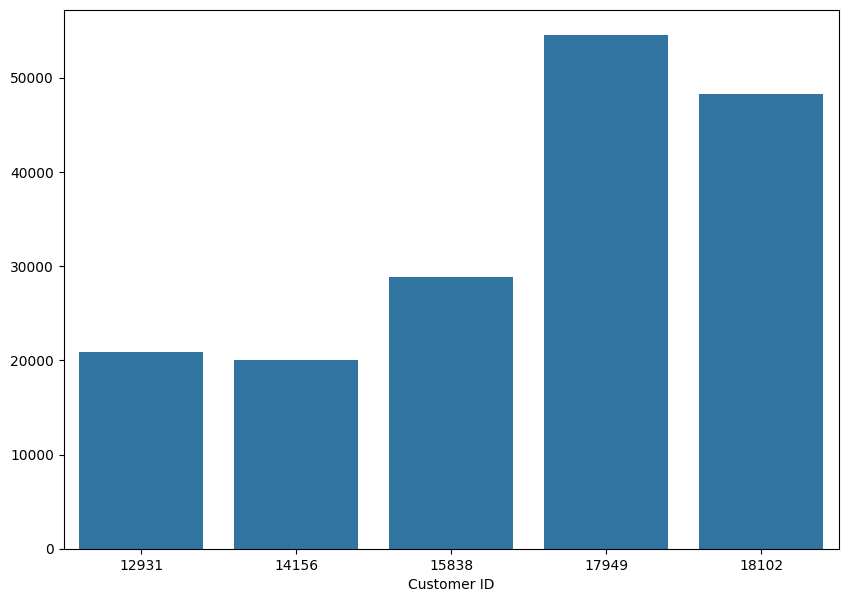

In [23]:
plt.figure(figsize=(10, 7))
sns.barplot(x=top_customers.index, y=top_customers.values)

Top 5 most selling product

In [26]:
df['StockCode'].value_counts().head(5)

StockCode
85123A    250
22423     185
M         149
85099B    115
POST      109
Name: count, dtype: int64

Top 5 countries with most purchase

In [27]:
df.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False).head(5)

Country
United Kingdom    928917.351
EIRE               34568.200
Netherlands        18639.700
Germany            14750.350
France             14178.100
Name: TotalRevenue, dtype: float64

In [28]:
country = df.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False).head(5)

In [29]:
country

Country
United Kingdom    928917.351
EIRE               34568.200
Netherlands        18639.700
Germany            14750.350
France             14178.100
Name: TotalRevenue, dtype: float64

Sales by Country (Top 5)

<Axes: xlabel='Country'>

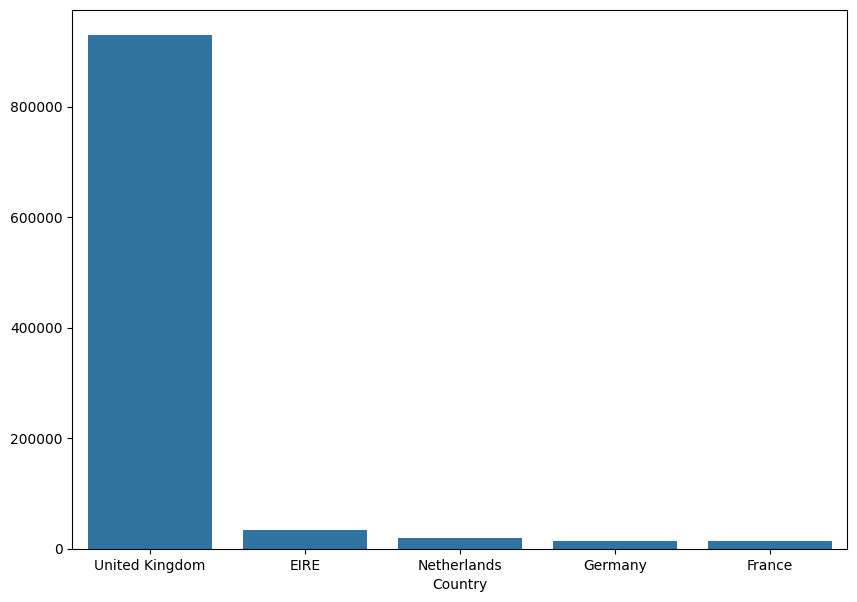

In [30]:
plt.figure(figsize=(10, 7))
sns.barplot(x=country.index, y=country.values)

Sales Trends by Hour of Day

In [31]:
df['Hour'] = df["InvoiceDate"].dt.hour
hourly_Sales = df.groupby("Hour")["TotalRevenue"].sum()

Text(0, 0.5, 'Sales')

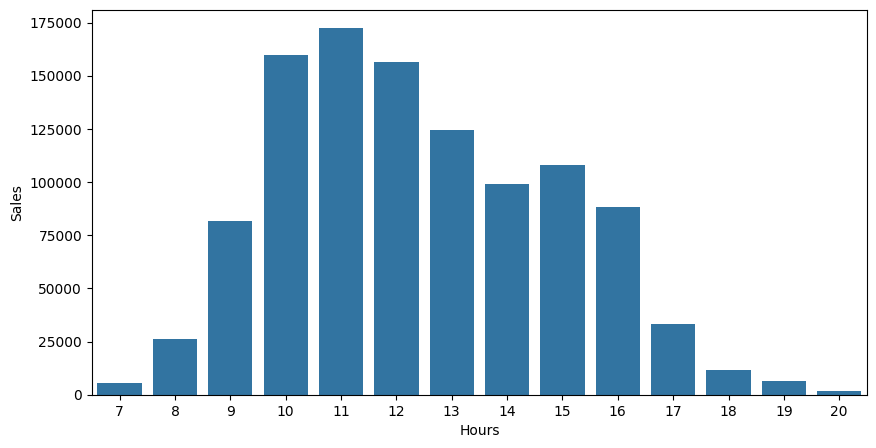

In [32]:
plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_Sales.index, y=hourly_Sales.values)
xlabel('Hours')
ylabel('Sales')